In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploring Fandango Displayed Scores versus True User Ratings

In [6]:
fandango = pd.read_csv('/Users/leeloo/Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/06-Capstone-Project/fandango_scrape.csv')

In [59]:
fandango

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [60]:
fandango.head()

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [61]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
 4   Year    504 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 19.8+ KB


In [62]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


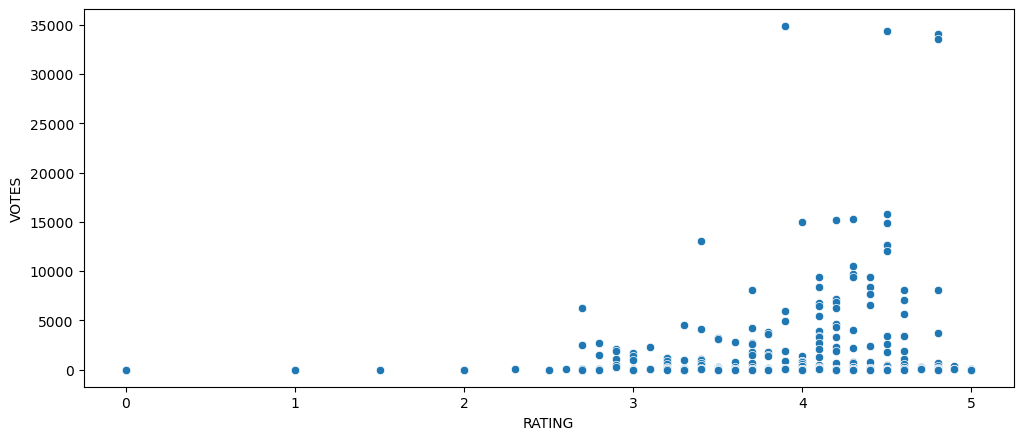

In [63]:
plt.figure(figsize=(12,5),dpi=100)
sns.scatterplot(data=fandango, x ='RATING',y ='VOTES')
plt.show()

In [64]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [65]:
title='Film Title Name (Year)'
title.split('(')[-1].replace(')','')
fandango['Year'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')',''))
fandango

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [67]:
fandango['Year'].value_counts()

2015    478
2014     23
2016      1
2012      1
1964      1
Name: Year, dtype: int64

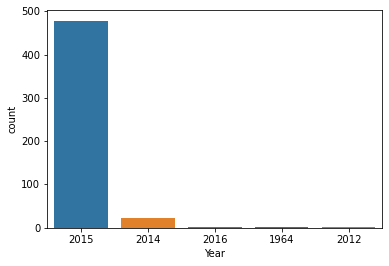

In [72]:
sns.countplot(data=fandango, x='Year');

In [75]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [104]:
no_votes=fandango['VOTES'] ==0
no_votes.sum()

69

In [105]:
fan_reviewed=fandango[fandango['VOTES']>0]

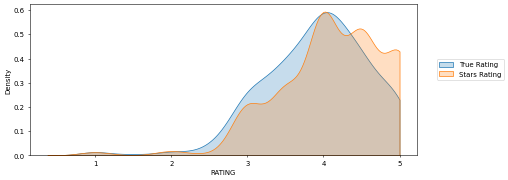

In [106]:
plt.figure(figsize=(10,4),dpi=50)
sns.kdeplot(data=fan_reviewed, x ='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewed, x ='STARS',clip=[0,5],fill=True,label='Stars Rating')
plt.legend(loc =(1.05,0.5))

plt.show()

In [112]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']

<ipython-input-112-cc8a3df60ecf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']


In [113]:
fan_reviewed

,FILM,STARS,RATING,VOTES,Year,STAFF_DIFF,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,0.0
...,...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0,0.0


In [137]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

<ipython-input-137-5b305d3aea42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


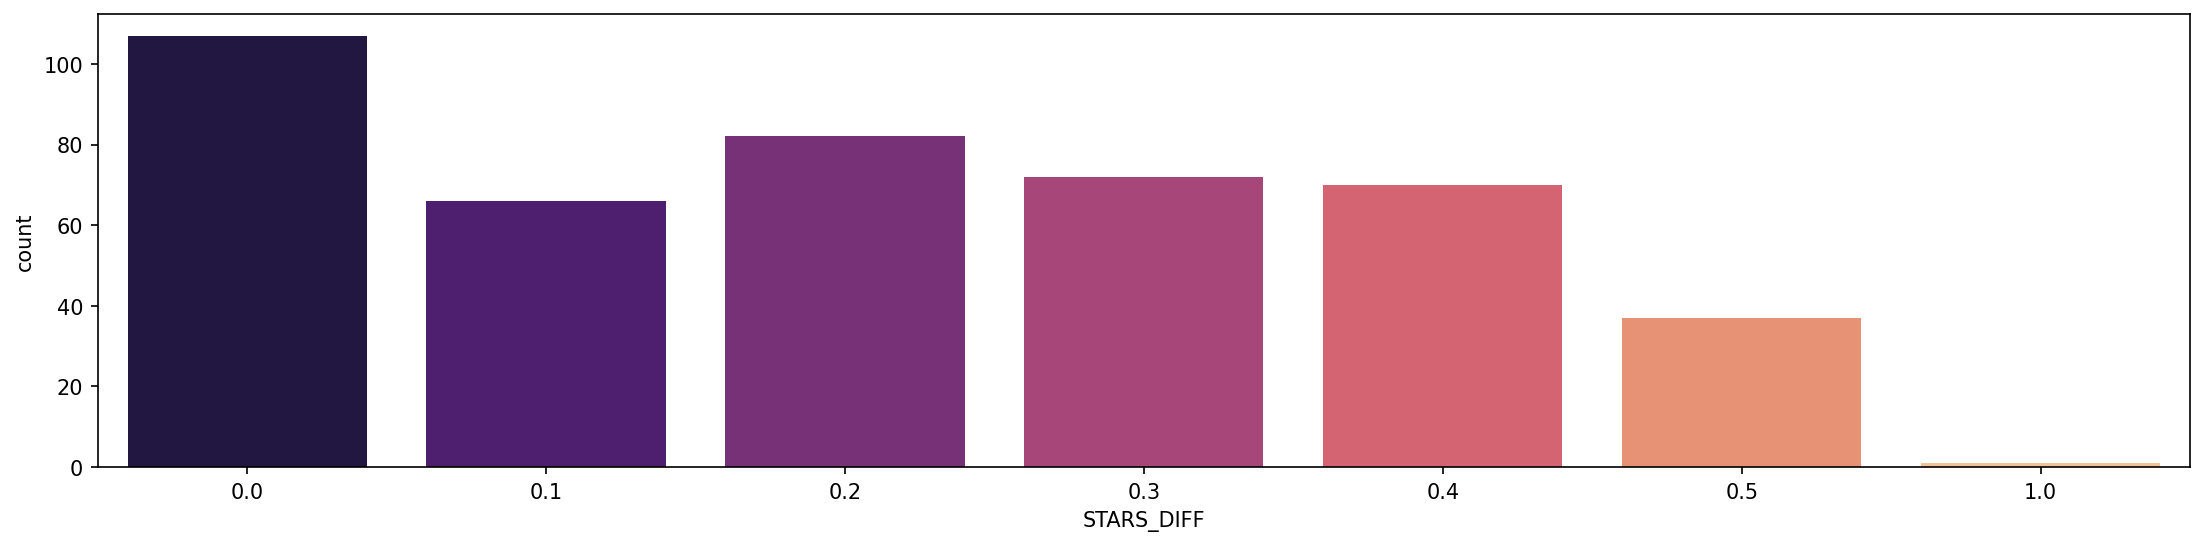

In [138]:
plt.figure(figsize=(18,4),dpi=150)

sns.countplot(data=fan_reviewed, x ='STARS_DIFF',palette='magma')

plt.show()

In [139]:
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,Year,STAFF_DIFF,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0,1.0


# Comparison of Fandango Ratings to Other Sites

In [140]:
all_sites = pd.read_csv('/Users/leeloo/Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/06-Capstone-Project/all_sites_scores.csv')
all_sites.head()



,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [141]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [146]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


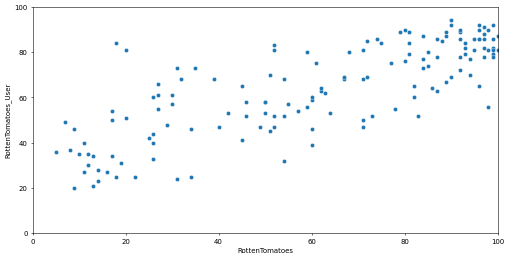

In [158]:
plt.figure(figsize=(12,6),dpi=50)

sns.scatterplot(data=all_sites, x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

plt.show()

In [160]:
all_sites['Rotten_Diff']= all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']


all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [164]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

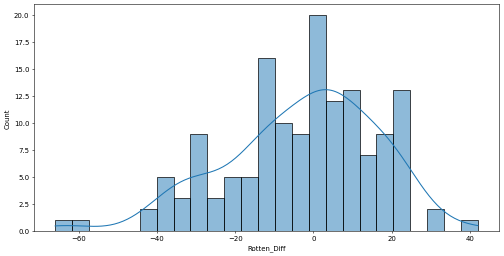

In [216]:
plt.figure(figsize=(12,6),dpi=50)

sns.histplot(data=all_sites, x= 'Rotten_Diff',kde=True,bins=25)

plt.show()

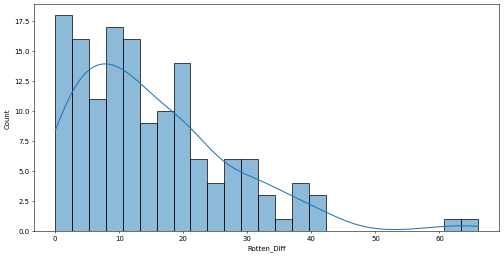

In [229]:
plt.figure(figsize=(12,6),dpi=50)

sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),kde=True,bins=25,)


plt.show()

In [231]:
all_sites.nsmallest(5,'Rotten_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


In [232]:
all_sites.nlargest(5,'Rotten_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


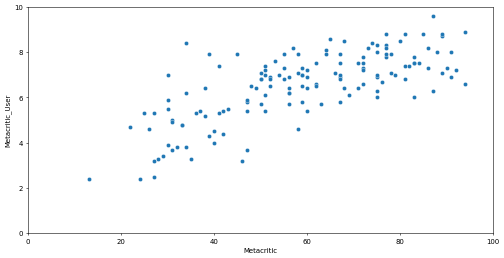

In [238]:
plt.figure(figsize=(12,6),dpi=50)

sns.scatterplot(data=all_sites, x='Metacritic',y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

plt.show()

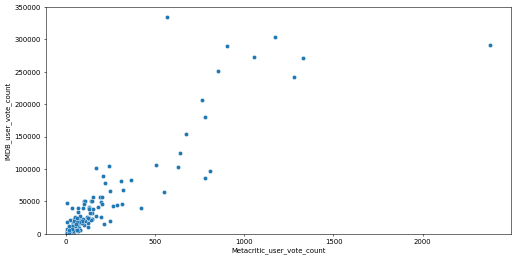

In [244]:
plt.figure(figsize=(12,6),dpi=50)

sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

plt.ylim(0,350000)


plt.show()

In [246]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [248]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# Fandago Scores vs. All Sites

In [249]:
df = pd.merge(fandango,all_sites, on='FILM', how ='inner')

In [250]:
df.head()

,FILM,STARS,RATING,VOTES,Year,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   Year                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


# Normalize columns to Fandango STARS and RATINGS 0-5

In [254]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [261]:
df.head()

,FILM,STARS,RATING,VOTES,Year,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [258]:
df['RT_Norm']= np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm']= np.round(df['RottenTomatoes_User']/20,1)

In [259]:
df['Meta_Norm']= np.round(df['Metacritic']/20,1)
df['MetaU_Norm']= np.round(df['Metacritic_User']/2,1)

In [262]:
df['IMDB_Norm']= np.round(df['IMDB']/2,1)


In [264]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'Year', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm', 'IMDB_Norm'],
      dtype='object')

In [269]:
Norm_scores=df[['RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm', 'IMDB_Norm','STARS', 'RATING']]
Norm_scores.head()

,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm,STARS,RATING
0,1.2,2.1,2.3,1.6,2.1,4.0,3.9
1,3.6,4.0,3.0,3.5,3.6,4.5,4.5
2,3.6,4.2,3.6,3.3,3.7,5.0,4.8
3,4.0,4.2,3.4,3.4,3.7,5.0,4.8
4,4.9,4.5,4.7,4.4,4.3,4.5,4.5


In [309]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    

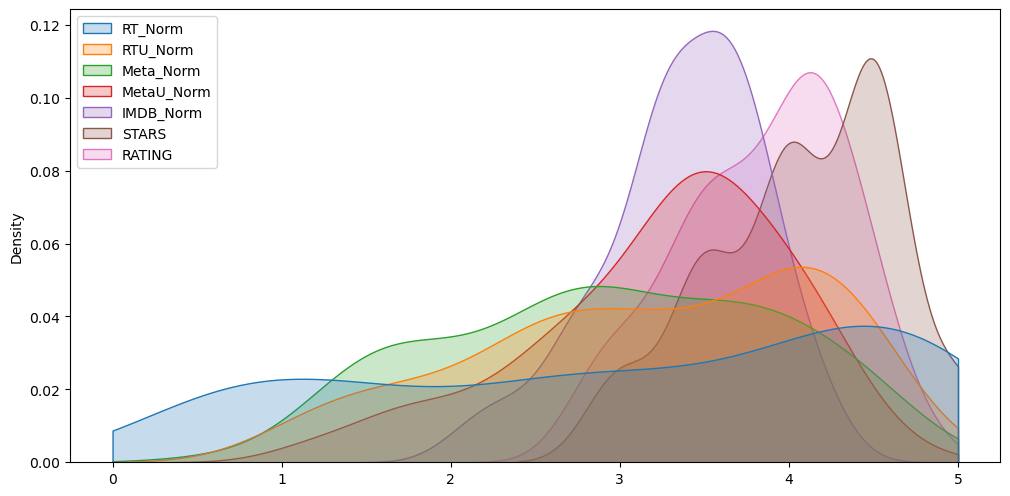

In [311]:

fig, ax = plt.subplots(figsize=(12,6),dpi=100)

sns.kdeplot(data=Norm_scores, shade=True,clip=[0,5])


move_legend(ax, "upper left");


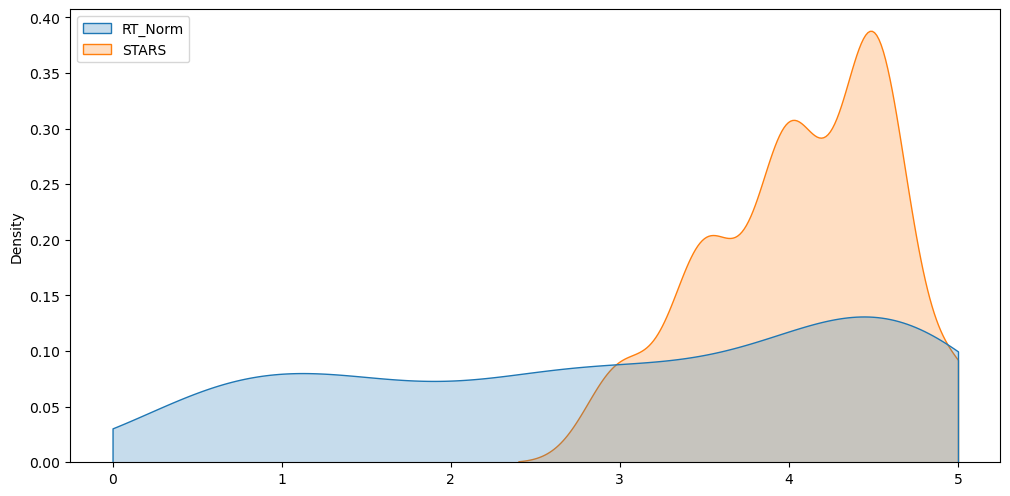

In [314]:

fig, ax = plt.subplots(figsize=(12,6),dpi=100)

sns.kdeplot(data=Norm_scores[['RT_Norm','STARS']], shade=True,clip=[0,5])


move_legend(ax, "upper left");


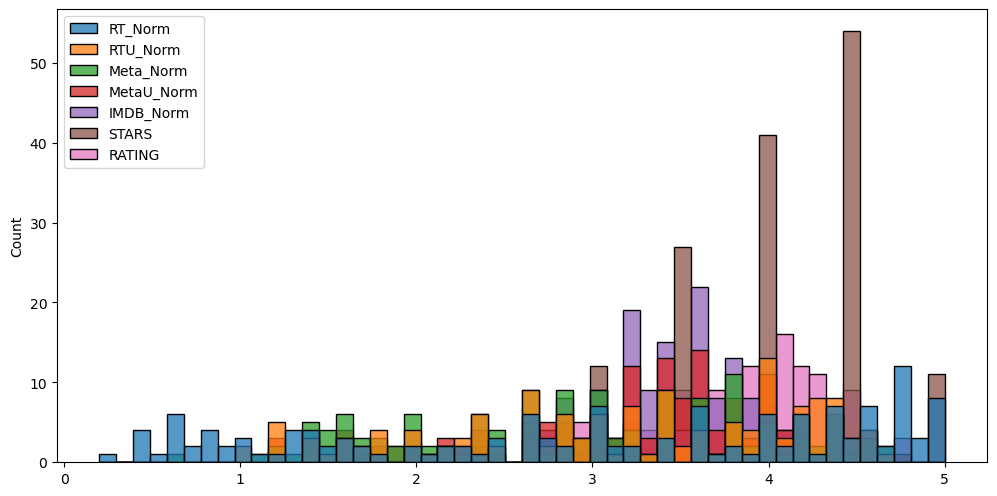

In [324]:
plt.figure(figsize=(12,6),dpi=100)
sns.histplot(data=Norm_scores,bins=50);

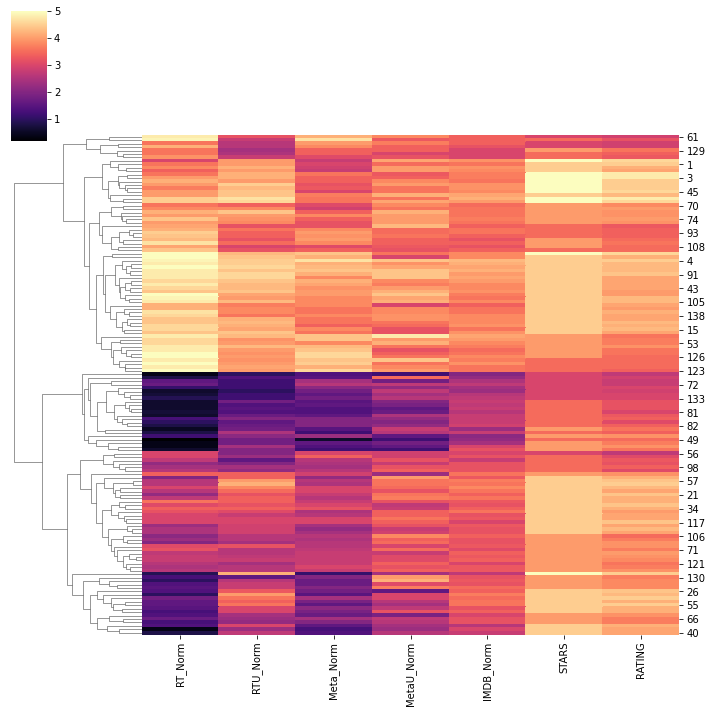

In [329]:
sns.clustermap(data=Norm_scores,cmap='magma',col_cluster=False);

In [338]:
Norm_scores.columns

Index(['RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm', 'IMDB_Norm', 'STARS',
       'RATING'],
      dtype='object')

In [339]:
norm_films=df[['RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm', 'IMDB_Norm', 'STARS',
       'RATING']]

In [345]:
worst_films=norm_films.nsmallest(10,'RT_Norm')

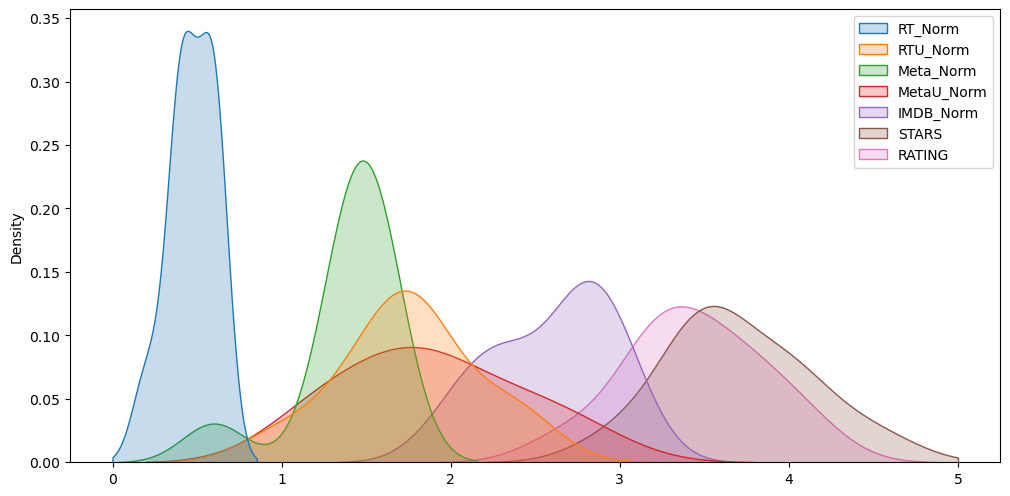

In [347]:

fig, ax = plt.subplots(figsize=(12,6),dpi=100)

sns.kdeplot(data=worst_films, shade=True,clip=[0,5])


move_legend(ax, "upper right");